In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model import BB_Model
from project_utils.feature_stats import Feature_Statistics
from project_utils.feature_stats import Regression_Container

Num_Points = 1


In [2]:
# Load Boston model

Boston_Data = BB_Model('Boston')

#Boston_Data.df().head()

In [3]:
Boston_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5751456678093605


MLPRegressor(random_state=RandomState(MT19937) at 0x278E74E9840)

In [4]:
Boston_Data.Random_Forest()

0.8060795577018616


RandomForestRegressor(random_state=RandomState(MT19937) at 0x278E74E9840)

In [5]:
print(Boston_Data.get_features())

['crime_rate', 'zoned_lots', 'industry', 'by_river', 'NOX', 'avg_rooms', 'pre_1940', 'emp_distance', 'rad_access', 'tax_rate', 'pupil_tea_rat', 'low_status']


In [6]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Boston_Data.get_TT_data()


#Initializing the explainer object
Unravel_Exp = UR_Model(bbox_model           = Boston_Data.get_Random_Forest(),
                       train_data           = X_train,
                       feature_names        = Boston_Data.get_features(),
                       categorical_features = Boston_Data.get_catagorical(),
                       mode                 = Boston_Data.get_mode())       


In [7]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [1.34228634e+00 1.29445983e+01 1.01390859e+01 7.20221607e-02
 5.36935457e-01 6.33221330e+00 6.60008310e+01 4.08617313e+00
 7.40443213e+00 3.71811634e+02 1.82645429e+01 1.15097784e+01]
Std 0:  [2.46496131e+00 2.43242405e+01 6.75777000e+00 2.58524600e-01
 1.12087287e-01 6.45004977e-01 2.77037328e+01 2.08262776e+00
 7.12316515e+00 1.45470839e+02 2.17626720e+00 6.33909563e+00]


In [8]:
#for i in range(5):
#    print(X_test[i,:])

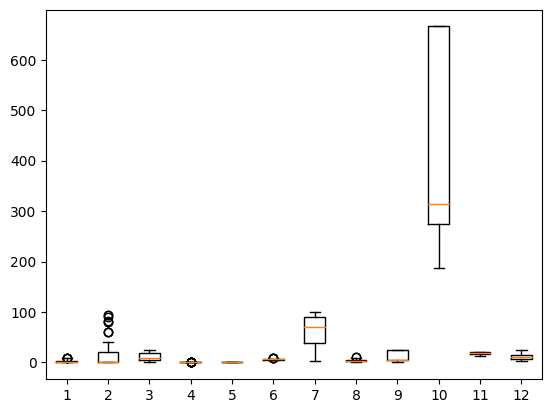

In [9]:
from matplotlib import pyplot
pyplot.boxplot(x=X_test)
pyplot.show()

In [10]:
# Generate explantion data for Random Forest

Boston_Stats = Feature_Statistics(feature_names = Boston_Data.get_features(), mode = Boston_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
    data_row  = np.array([X_test[test_instance]])
    
    Unravel_Exp.explain(X_init            = data_row,
                        alpha             = "FUR_W",
                        max_iter          = 20,
                        normalize         = False)
    
    scores = Unravel_Exp.KL_importance(show_plot=True)
       
    f_predict = Boston_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = Unravel_Exp.exp_predict(data_row)
    
    e_predict = np.array(e_predict).ravel()
    
    print(f_predict, e_predict)
    

    Boston_Stats.Add_Sample(sample_scores = scores,
                            outcome       = y_test[test_instance],
                            f_prediction  = f_predict,
                            e_prediction  = e_predict)
    

INSTANCE:  0


<class 'ValueError'>: setting an array element with a sequence.

In [ ]:
stop!!

In [ ]:

Boston_Stats.Feature_Counts(max_features=8, scaled=True, threshold=0.075)

In [ ]:
Boston_Stats.Frequency_Plot()

In [ ]:
Boston_Stats.Box_Plot()

In [ ]:
Boston_Stats.Violin_Plot(top_features=False)

In [ ]:
Boston_Container = Regression_Container(Boston_Stats, 5)

Boston_Container.Feature_Counts(max_features=11, scaled=True, threshold=0.05)


In [ ]:
Boston_Container.Frequency_Plot()

In [ ]:
Boston_Stats.Fidelity()

In [ ]:
Boston_Stats.Jaccard_Values()

In [ ]:
Boston_Stats.Reg_Fidelity_Graph()